In [1]:
import numpy as np
from scipy.stats import norm

In [2]:
N = norm.cdf

## Black Scholes model

In [3]:
def BS_Call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)
def BS_Put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

## Delta

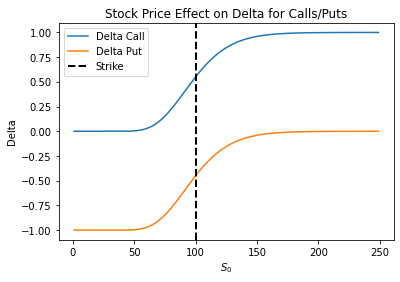

In [4]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def d1(S, K, T, r, sigma):
    return (np.log(S/K) + (r + sigma**2/2)*T) /\
                     sigma*np.sqrt(T)

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma) - sigma* np.sqrt(T)

def delta_call(S, K, T, r, sigma):
    N = norm.cdf
    return N(d1(S, K, T, r, sigma))
    
def delta_fdm_call(S, K, T, r, sigma, ds = 1e-5, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_Call(S+ds, K, T, r, sigma) -BS_Call(S-ds, K, T, r, sigma))/\
                        (2*ds)
    elif method == 'forward':
        return (BS_Call(S+ds, K, T, r, sigma) - BS_Call(S, K, T, r, sigma))/ds
    elif method == 'backward':
        return (BS_Call(S, K, T, r, sigma) - BS_Call(S-ds, K, T, r, sigma))/ds
    
    
def delta_put(S, K, T, r, sigma):
    return - N(-d1(S, K, T, r, sigma))

def delta_fdm_put(S, K, T, r, sigma, ds = 1e-5, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_Put(S+ds, K, T, r, sigma) -BS_Put(S-ds, K, T, r, sigma))/\
                       (2*ds)
    elif method == 'forward':
        return (BS_Put(S+ds, K, T, r, sigma) - BS_Put(S, K, T, r, sigma))/ds
    elif method == 'backward':
        return (BS_Put(S, K, T, r, sigma) - BS_Put(S-ds, K, T, r, sigma))/ds


S = 100
K = 100
T = 1
r = 0.00
sigma = 0.25

prices = np.arange(1, 250,1)

deltas_c = delta_call(prices, K, T, r, sigma)
deltas_p = delta_put(prices, K, T, r, sigma)
deltas_back_c = delta_fdm_call(prices, K, T,r, sigma, ds = 0.01,method='backward')
deltas_forward_p = delta_fdm_put(prices, K, T,r, sigma, ds = 0.01,method='forward')

plt.plot(prices, deltas_c, label='Delta Call')
plt.plot(prices, deltas_p, label='Delta Put')
plt.xlabel('$S_0$')
plt.ylabel('Delta')
plt.title('Stock Price Effect on Delta for Calls/Puts' )
plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.legend()

## Gamma

Text(0, 0.5, 'Gamma')

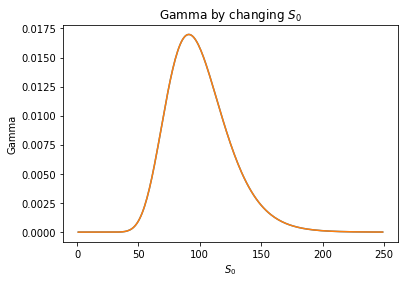

In [5]:
def gamma(S, K, T, r, sigma):
    N_prime = norm.pdf
    return N_prime(d1(S,K, T, r, sigma))/(S*sigma*np.sqrt(T))


def gamma_fdm(S, K, T, r, sigma , ds = 1e-5, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_Call(S+ds , K, T, r, sigma) -2*BS_Call(S, K, T, r, sigma) + 
                    BS_Call(S-ds , K, T, r, sigma) )/ (ds)**2
    elif method == 'forward':
        return (BS_Call(S+2*ds, K, T, r, sigma) - 2*BS_Call(S+ds, K, T, r, sigma)+
                   BS_Call(S, K, T, r, sigma) )/ (ds**2)
    elif method == 'backward':
        return (BS_Call(S, K, T, r, sigma) - 2* BS_Call(S-ds, K, T, r, sigma)
                + BS_Call(S-2*ds, K, T, r, sigma)) /  (ds**2)  


gammas = gamma(prices, K, T, r, sigma)
gamma_forward = gamma_fdm(prices, K, T, r, sigma, ds =0.01,method='forward')

plt.plot(prices, gammas)
plt.plot(prices, gamma_forward)
plt.title('Gamma by changing $S_0$')
plt.xlabel('$S_0$')
plt.ylabel('Gamma')

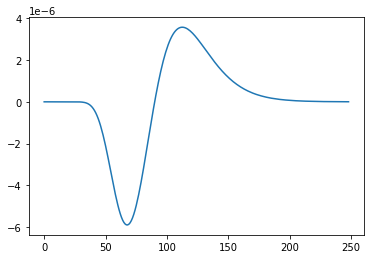

In [6]:
plt.plot(gammas -gamma_forward)

## Vega

In [7]:
def vega(S, K, T, r, sigma):
    N_prime = norm.pdf
    return S*np.sqrt(T)*N_prime(d1(S,K,T,r,sigma)) 

def vega_fdm(S, K, T, r, sigma, dv=1e-4, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_Call(S, K, T, r, sigma+dv) -BS_Call(S, K, T, r, sigma-dv))/\
                        (2*dv)
    elif method == 'forward':
        return (BS_Call(S, K, T, r, sigma+dv) - BS_Call(S, K, T, r, sigma))/dv
    elif method == 'backward':
        return (BS_Call(S, K, T, r, sigma) - BS_Call(S, K, T, r, sigma-dv))/dv
 

Text(0.5, 1.0, 'Vega Decrease with Time')

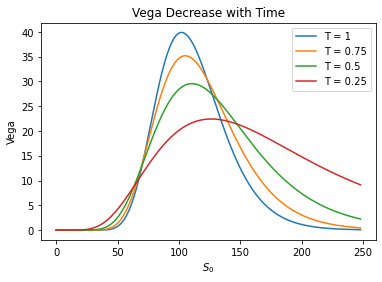

In [8]:
Ts = [1,0.75,0.5,0.25]

for t in Ts:
    plt.plot(vega(prices, K, t, r, sigma), label=f'T = {t}')

plt.legend()
plt.xlabel('$S_0$')
plt.ylabel('Vega')
plt.title('Vega Decrease with Time')

## Theta

Text(0, 0.5, 'Theta')

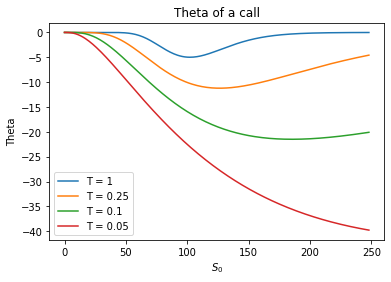

In [9]:
def theta_call(S, K, T, r, sigma):
    N_prime = norm.pdf
    p1 = - S*N_prime(d1(S, K, T, r, sigma))*sigma / (2 * np.sqrt(T))
    p2 = r*K*np.exp(-r*T)*N(d2(S, K, T, r, sigma)) 
    return p1 - p2

def theta_put(S, K, T, r, sigma):
    N_prime = norm.pdf
    p1 = - S*N_prime(d1(S, K, T, r, sigma))*sigma / (2 * np.sqrt(T))
    p2 = r*K*np.exp(-r*T)*N(-d2(S, K, T, r, sigma)) 
    return p1 + p2

def theta_call_fdm(S, K, T, r, sigma, dt, method='central'):
    method = method.lower() 
    if method =='central':
        return -(BS_Call(S, K, T+dt, r, sigma) -BS_Call(S, K, T-dt, r, sigma))/\
                        (2*dt)
    elif method == 'forward':
        return -(BS_Call(S, K, T+dt, r, sigma) - BS_Call(S, K, T, r, sigma))/dt
    elif method == 'backward':
        return -(BS_Call(S, K, T, r, sigma) - BS_Call(S, K, T-dt, r, sigma))/dt
    
def theta_put_fdm(S, K, T, r, sigma, dt, method='central'):
    method = method.lower() 
    if method =='central':
        return -(BS_Put(S, K, T+dt, r, sigma) -BS_Put(S, K, T-dt, r, sigma))/\
                        (2*dt)
    elif method == 'forward':
        return -(BS_Put(S, K, T+dt, r, sigma) - BS_Put(S, K, T, r, sigma))/dt
    elif method == 'backward':
        return -(BS_Put(S, K, T, r, sigma) - BS_Put(S, K, T-dt, r, sigma))/dt




theta_call(100,100,1, 0.1,0.05)
Ts = [1,0.25,0.1,0.05]
for t in Ts:
    plt.plot(theta_call(prices, K, t, r, sigma), label=f'T = {t}')

plt.legend()
plt.title('Theta of a call')
plt.xlabel('$S_0$')
plt.ylabel('Theta')

## Rho

In [10]:
def rho_call(S, K, T, r, sigma):
    return K*T*np.exp(-r*T)*N(d2(S, K, T, r, sigma))

def rho_put(S, K, T, r, sigma):
    return -K*T*np.exp(-r*T)*N(-d2(S, K, T, r, sigma))


def rho_call_fdm(S, K, T, r, sigma, dr, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_Call(S, K, T, r+dr, sigma) -BS_Call(S, K, T, r-dr, sigma))/\
                        (2*dr)
    elif method == 'forward':
        return (BS_Call(S, K, T, r+dr, sigma) - BS_Call(S, K, T, r, sigma))/dr
    elif method == 'backward':
        return (BS_Call(S, K, T, r, sigma) - BS_Call(S, K, T, r-dr, sigma))/dr
  
def rho_put_fdm(S, K, T, r, sigma, dr, method='central'):
    method = method.lower() 
    if method =='central':
        return (BS_Put(S, K, T, r+dr, sigma) -BS_Put(S, K, T, r-dr, sigma))/\
                        (2*dr)
    elif method == 'forward':
        return (BS_Put(S, K, T, r+dr, sigma) - BS_Put(S, K, T, r, sigma))/dr
    elif method == 'backward':
        return (BS_Put(S, K, T, r, sigma) - BS_Put(S, K, T, r-dr, sigma))/dr